In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py

import richio
richio.plots.use_nice_style()

2025-09-25 15:52:44.556 | INFO     | richio.config:<module>:11 - PROJ_ROOT path is: /zfsstore/user/hey4/rich_tde


## 2D Sedov single core

In [ ]:
f = h5py.File('/home/hey4/data/raw/sedov400_rank_0.h5')

In [20]:
rho = f['hydrodynamic/density'][:]

In [21]:
x = f['geometry/x_coordinate'][:]
y = f['geometry/y_coordinate'][:]

In [22]:
import matplotlib.pyplot as plt

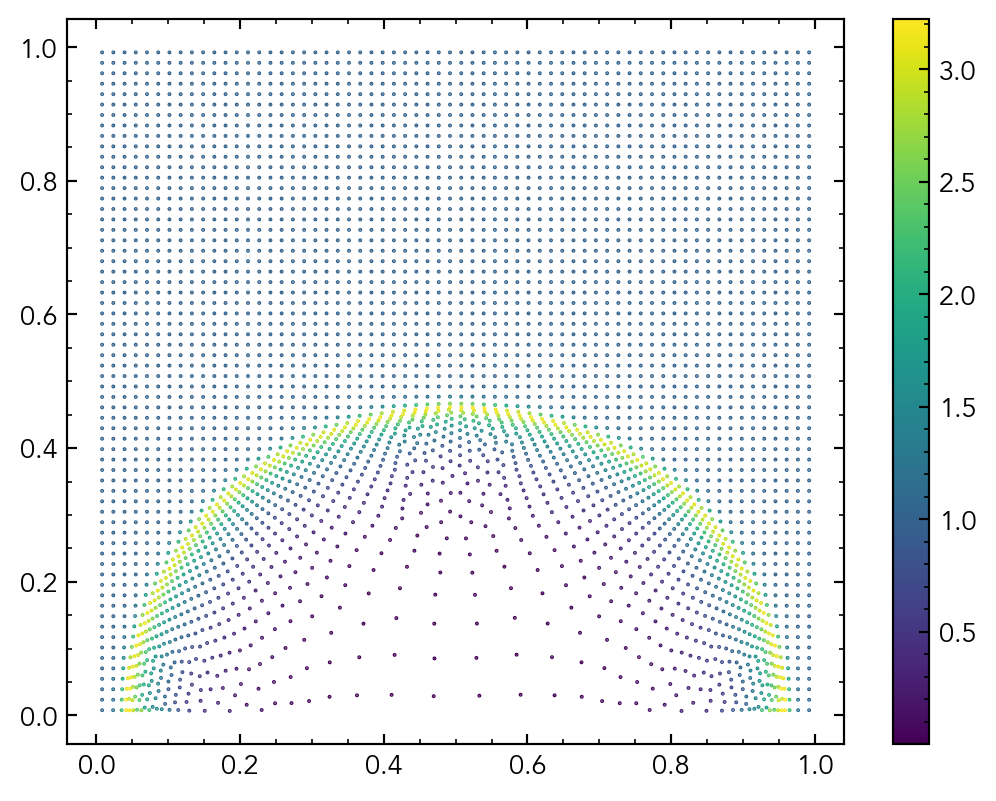

In [23]:
plt.scatter(x=x, y=y, c=rho, s=0.2)
plt.colorbar()

## 3D Sedov MPI

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py

import richio
richio.plots.use_nice_style()

In [12]:
snap = richio.load('/home/hey4/rich_tde/data/raw/sedov3dMPI/sedov_final.h5')

In [13]:
snap.keys()

['CMx',
 'CMy',
 'CMz',
 'Density',
 'Eg_0',
 'Erad',
 'ID',
 'InternalEnergy',
 'Pressure',
 'Temperature',
 'Volume',
 'Vx',
 'Vy',
 'Vz',
 'X',
 'Y',
 'Z',
 'stickers',
 'tracers']

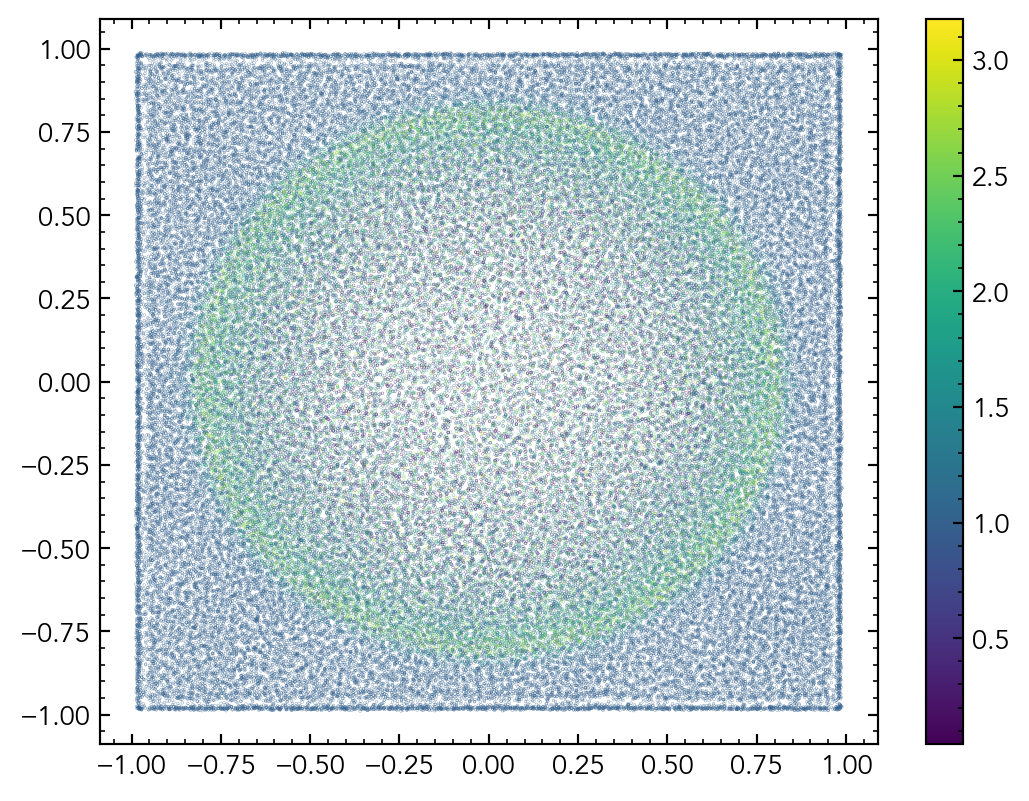

In [14]:
rho = snap['Density']
x = snap['X']
y = snap['Y']
import matplotlib.pyplot as plt
plt.scatter(x=x, y=y, c=rho, s=0.01)
plt.colorbar()

Question: are there overlap of particles between snapshots?

In [ ]:
for i in range(9):
    id1 = f[f'rank{i}/ID'][:]
    for j in range(9):
        if i > j:
            id2 = f[f'rank{j}/ID'][:]
            print(i, j)
            print(np.intersect1d(id1, id2)) 
# Okay, all empty, as it should be

In [22]:
ids = np.array([])
for i in range(9):
    id = f[f'rank{i}/ID'][:]
    ids = np.concatenate([ids, id])

print(ids)

[ 9143.  1462.  4024. ... 73867. 55313. 82839.]


In [30]:
ids = np.array(ids, dtype=int)
ids = np.sort(ids)

In [32]:
(ids == np.arange(100000)).all()

np.True_